<a href="https://colab.research.google.com/github/Rogerio-mack/Temporal/blob/main/Cap%C3%ADtulo_2_Modelos_de_suaviza%C3%A7%C3%A3o_Exponencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings('ignore', 'statsmodels',
                        FutureWarning)

# **2. Modelos de Suavização Exponencial**
---

Neste capítulo você irá aprender:

1. O uso dos modelos de Suavização Exponencial (SE) para fazer previsões
2. Identificar as estruturas de cada modelo de SE e suas aplicações
3. O uso da *library statsmodels* para ajustar modelos de SE

A estrutura dos modelos de Suavização Exponencial (em inglês, *Exponential smoothing*) é baseada no cálculo de médias ponderadas das observaçoes registradas ao longo do tempo. Os pesos atribuidos decaem exponencialmente atribuindo-se maiores pesos às observações recentes.

A escolha do método de Suavização Exponencial baseia-se, principalmente, na identificação dos componentes (tendência e/ou sazonalidade) da série temporal a ser modelada e na forma como estes devem ser modelados, no caso de, por exemplo, séries com comportamentos sazonais deve-se identificar se este é aditivo ou multiplicativo, conceitos que vamos discutir ao longo do capítulo.

Neste capítulo vamos a estudar, principalmente, três modelos de SE:

1. Modelo exponencial simple, para séries estacionárias.
2. Modelo exponencial Holt, para séries com tendência
3. Modelo exponencial de Holt-Winters, para séries com componente sazonal e/ou tendência.


## **Modelo 1. Simple exponential smoothing**

O modelo de **Suavização exponencial simples** é adequado para modelar séries temporais estacionárias, isto é,  sem tendências ou comportamentos sazonais. Na estrutura deste modelo os pesos atribuidos às observações diminuem exponencialmente conforme as observações se afastam do instante $t$. Seja $Z_t$ o valor da série no instante $t$, temos

<center><H5> $Z_{t+1}= \alpha Z_{t}+ \alpha(1-\alpha)Z_{t-1}+\alpha(1-\alpha)^2Z_{t-2}+...,$ (2.1) </center></H5>

em que $0\leq \alpha \leq 1$ é o parâmetro de suavização e $t=1,2,...,T$. Podemos deduzir que quando o parâmetro de suavização, $\alpha$, for próximo de 1, é dado maior peso às observações mais recentes. Já quando $\alpha$ for próximo de zero as observações mais distântes têm pesos maiores. Vale destacar que quando $\alpha=1$ a previsão para o instante $T+1$ é igual ao valor da série no instante $T$.



O parâmetro de suavização $\alpha$ e o valor inicial, $Z_0$, podem ser estimados minimizando a soma dos quadrados dos resíduos definidos como:

<center>
$SQ=\sum_{t=1}^{T} (Z_t - \hat{Z}_t)^2$
</center>

em que $Z_t$ e $\hat{Z}_t$ são, respectivamente, os valores observado e ajustado para o instante $t$. Uma vez que minimizar a SQ é um problema de minimização não linear implementaremos a módulo *ExponentialSmoothing* da biblioteca *statsmodels* de python para estimar estes valores. Vale destacar que na prática, em alguns casos, estes valores podem ser escolhidos *a priori* pelo pesquisador com base na sua experiência.



**Previsões**. Note que neste modelo a previsão de um passo à frente de $Z_t$, isto é, no instante $t=T+1$, é uma média ponderada de todas as observações da série até o instante $T$. O modelo de SE simples tem previsões “fat” uma vez que todas as previsões assumem o valor obtido na última suavização. Assim, salienta-se que essas previsões serão adequadas se a série temporal ajustada é estacionária.





Vamos usar uma representação alternativa deste modelo, na forma de componentes, para entender mais fácil as diferentes estruturas dos próximos modelos de Suavização Exponencial. No caso do modelo de Suavização exponencial simples a sua estrutura é dada por:

<center>

Equação de previsão: $\hat{Z}_{T+h}= l_T,  \ h=1,2,...$

Equação de nível: $l_T= \alpha Z_T + (1-\alpha)h_{T-1}$

</center>

Para este modelo de suavização o único componente incluído é o nível $l_t$ uma vez que as séries indicadas para serem ajustadas usando este modelo devem ser estacionárias, isto é, suas observações devem-se desenvolver de forma aleatória em torno de um valor (ou nível). A equação de nível é exatamente o modelo apresentado na equação 2.1. Nos próximos modelos de SE que estudaremos neste capítulo veremos que também podem-se considerar, na estrutura do modelo, componentes de tendência e sazonalidade.

No seguinte exemplo vamos estudar como usar a biblioteca *statsmodels/ExponentialSmoothing* de python.

### Exemplo 1

Vamos ajustar a série mensal: Produção Física Industrial de Abate e fabricação de produtos de carne do Brasil no período de janeiro de 2018 a dezembro de 2022. Disponível em https://sidra.ibge.gov.br/tabela/7511. 

In [ ]:
# Importando a série temporal

df1=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Producao.xlsx") 
df1.index=pd.date_range(start='1/2018', end='07/2022', freq='M')
df1.head()

,mês,ano,valor
2018-01-31,janeiro,2018,101.25894
2018-02-28,fevereiro,2018,89.10814
2018-03-31,março,2018,99.17116
2018-04-30,abril,2018,98.00487
2018-05-31,maio,2018,84.99263


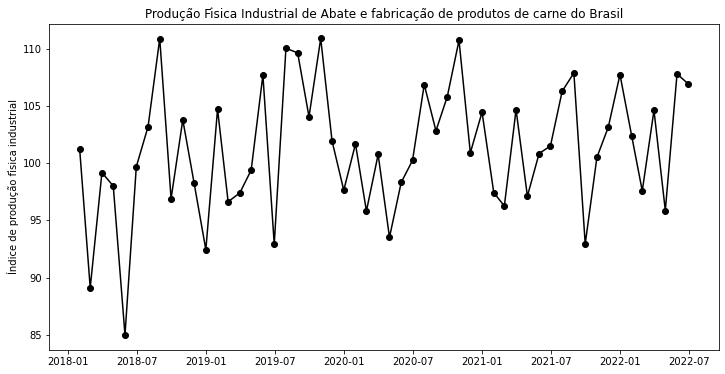

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df1.valor, marker="o", color="black")
plt.ylabel("Índice de produção física industrial")
plt.title("Produção Física Industrial de Abate e fabricação de produtos de carne do Brasil")
plt.show()

Observa-se que o índice de produção aparentemente não apresenta tendências nem comportamentos sazonais, seus valores variam entre 84,99 e 110,89 unidades. O índice médio no período estudado é de 101.18 unidades. Maiores detalhes do índice podem ser encontrados no site do IBGE, neste capítulo estaremos interessados na modelagem da série. 

In [ ]:
Ajuste=SimpleExpSmoothing(df1.valor, initialization_method="estimated").fit(optimized=True)
print(Ajuste.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  valor   No. Observations:                   54
Model:             SimpleExpSmoothing   SSE                           1698.341
Optimized:                       True   AIC                            190.215
Trend:                           None   BIC                            194.193
Seasonal:                        None   AICC                           191.031
Seasonal Periods:                None   Date:                 Fri, 20 Jan 2023
Box-Cox:                        False   Time:                         19:09:28
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level           1.4901e-08                alpha                 True
initial_level              101.18214                

O valor estimado de $\alpha$ é 1.4901e-08, muito pequeno indicando os valores ajustados serão muito parecidos com o valor incial $Z_0$, uma vez que os valores distântes apresentam maiores pesos. Por fim, o valor inicial de estimado de $z_t$ foi de 101,18.

Usando o método de inicialização "estimated", os valores de $\alpha$ e $Z_0$ serão estimados usando o algortimo L-BFGS-B (default) para minimizar a soma de quadrados dos resíduos. Pode-se selecionar o método de mínimos quadrados adicionando na função fit method="ls". Vale detacar que o método implementado pode aumentar o tempo de minimização. 

In [ ]:
# Previsões 

print(Ajuste.forecast(5))

2022-07-31    101.182144
2022-08-31    101.182144
2022-09-30    101.182144
2022-10-31    101.182144
2022-11-30    101.182144
Freq: M, dtype: float64


Note que as previsões são "flat", isto é, os próximos 5 valores previstos da séries são os mesmos. A seguir, como exercício, vamos analisar o comportamento das previsões e o ajuste do modelo de SE simples quando considerados diferentes valores de $\alpha$ (não só o valor que minimiza a soma dos resíduos ao quadrado) 

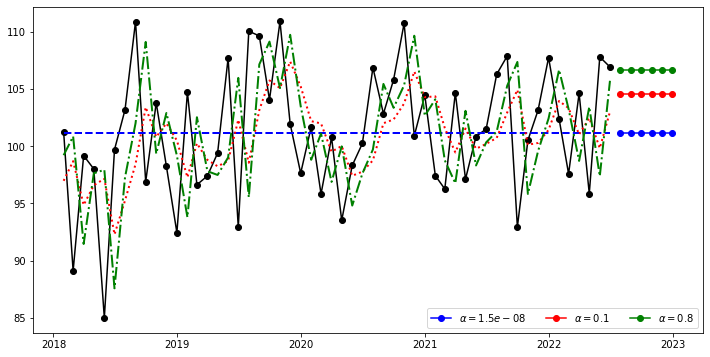

In [ ]:
plt.figure(figsize=(12, 6))

fit1=SimpleExpSmoothing(df1.valor, initialization_method="estimated").fit(optimized=True)
fit2 = SimpleExpSmoothing(df1.valor, initialization_method="heuristic").fit(smoothing_level=0.4)
fit3 = SimpleExpSmoothing(df1.valor, initialization_method="heuristic").fit(smoothing_level=0.8)

plt.plot(df1.valor, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue",linewidth=2, linestyle="dashed")
plt.plot(fit2.fittedvalues, color="red",linewidth=2, linestyle="dotted")
plt.plot(fit3.fittedvalues, color="green",linewidth=2, linestyle="dashdot")

fcast1 = fit1.forecast(6)
fcast2 = fit2.forecast(6)
fcast3 = fit3.forecast(6)

(line1,) = plt.plot(fcast1, marker="o", color="blue")
(line2,) = plt.plot(fcast2, marker="o", color="red")
(line3,) = plt.plot(fcast3, marker="o", color="green")

plt.legend([line1, line2, line3],
           [r"$\alpha=%s$" % round(fit1.model.params["smoothing_level"],9), r"$\alpha=0.4$", r"$\alpha=0.8$"],
           ncol=3, loc="lower right")
plt.show()

Note que independentemente do valor de $\alpha$ as previsões sempre são "flat". Para valores altos de $\alpha$ observa-se que as previsões são próximas do último valor observado, já para valores próximos de zero o valor previsto é próximo do valor médio da série. Note que o menor valor de AIC é atingido para o valor de $\alpha$ estimado.

In [ ]:
print("AIC dos modelos ajustados")
print("Modelo 1 (\u03B1 =", round(fit1.model.params["smoothing_level"],9),"):", round(fit1.aic,4))
print("Modelo 2 (\u03B1 =", 0.4,"):", round(fit2.aic,4))
print("Modelo 3 (\u03B1 =", 0.8,"):", round(fit3.aic,4))

AIC dos modelos ajustados
Modelo 1 (α = 1.5e-08 ): 190.2148
Modelo 2 (α = 0.4 ): 199.3423
Modelo 3 (α = 0.8 ): 213.9655


## **Modelo 2. Holt’s linear trend method**

O modelo de suavização exponencial simples é generalizado por Holt (1957) para modelar séries temporais com tendência. Neste modelo de SE consideram-se dois componentes na sua estrutura: Nível e Tendência.


<center>

Equação de previsão: $\hat{Z}_{T+h}= l_T + h b_T, h=1,2,...$

Equação de nível: $l_t= \alpha Z_t + (1-\alpha)(l_{t-1}+b_{t-1})$

Equação de tendência: $ b_t=\beta \Delta l_t + (1-\beta)b_{t-1}$

</center>

em que $\Delta l_t = l_{t}-l_{t-1}$. 

Observa-se que neste modelo as previsões para $h$ passos à frente, isto é, no intante $Z_{T+h}$, são dadas pela soma do nível da série no intante $t$ e $h$ vezes a tendência estimada no intante $T$. Portanto, as previsões são uma função linear de $h$. Na equação de nível, valores de $\alpha$ próximos de 1 indicam que o nível da série altera-se fortemente a cada nova observação. Por fim, na equação da tendência ou inclinação um valor de $\beta$ próximo de zero indica que a inclinação da série dificilmente muda ao longo do tempo. Ressalta-se que os parâmetros $\alpha$ e $\beta$ assumem valores entre zero e um.

 

### Exemplo 2

Vamos ajustar a série trimestral: PIB a preços de mercado - Valores Correntes (Bilhões de Reais) do primeiro trimestre de 2005 ao terceiro trimestre de 2022. Disponível: https://www.ibge.gov.br/estatisticas/economicas/industria/9300-contas-nacionais-trimestrais.html?=&t=series-historicas

In [ ]:
# Série temporal
df2=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/PIB.xlsx") #IBGE - Trimestral
df2.index=pd.date_range(start='1/2010', end='8/2022', freq='3M')
df2.head()

,trimestre,ano,valor
2010-01-31,1,2010,886.397
2010-04-30,2,2010,944.145
2010-07-31,3,2010,997.935
2010-10-31,4,2010,1057.370
2011-01-31,1,2011,1016.531


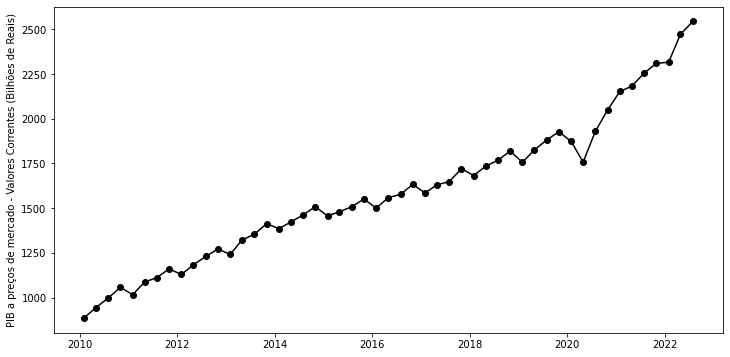

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(df2.valor, marker="o", color="black")
plt.ylabel("PIB a preços de mercado - Valores Correntes (Bilhões de Reais)")
plt.show()

Nota-se uma tendência crescente no PIB a preços de mercado no período de estudo. Salienta-se a queda durante o segundo trimestre de 2020 decorrente, provavelmente, dos impactos do COVID-19. No entanto, observa-se que nos próximos trimestres voltou a tendência crescente na série.

In [ ]:
Ajuste2 = ExponentialSmoothing(df2.valor,trend="additive",initialization_method="estimated").fit()
print(Ajuste2.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    valor   No. Observations:                   51
Model:             ExponentialSmoothing   SSE                         145511.300
Optimized:                         True   AIC                            413.765
Trend:                         Additive   BIC                            421.493
Seasonal:                          None   AICC                           415.674
Seasonal Periods:                  None   Date:                 Sun, 22 Jan 2023
Box-Cox:                          False   Time:                         21:11:03
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8423535                alpha                 True
smoothing_trend            0.00113

O valor estimado de $\alpha$ é 0,84, um valor alto (próximo de 1) indicando que o nível da série se altera a cada valor observado. O valor do parâmetro de suaviazação da equação de tendência $\beta$ foi de 0.0011. Neste ajuste consideramos uma tendência aditiva, para ajustar uma tendência multiplicativa é suficiente com trocar "additive" por "multiplicative" no função trend. Vale destacar que uma tendência aditiva indica que há uma tendência linear e uma multiplicativa uma tendência não linear. Usando o método de inicialização "estimated", os valores de $\alpha$, $\beta$ e os valores iniciais serão estimados usando o algortimo L-BFGS-B (default) para minimizar a soma de quadrados dos resíduos.  

In [ ]:
print(Ajuste2.forecast(5))

2022-10-31    2567.148111
2023-01-31    2599.817290
2023-04-30    2632.486468
2023-07-31    2665.155647
2023-10-31    2697.824825
Freq: 3M, dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Observa-se que os valores previstos acompanham a tendência crescente, cada valor apresenta um aumento relativo em relação ao valor anterior de aproximadamente 1,272%. A seguir, como exercício, mostramos o comportamento das previsões quando considerados outros valores dos parâmetros de suaviação das equações de nível e tendência.

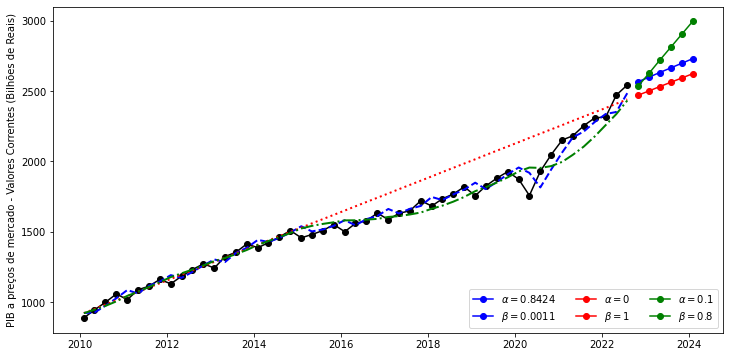

In [ ]:
plt.figure(figsize=(12, 6))
plt.ylabel("PIB a preços de mercado - Valores Correntes (Bilhões de Reais)")

fit1=ExponentialSmoothing(df2.valor,trend="additive",initialization_method="estimated").fit()
fit2 = ExponentialSmoothing(df2.valor,trend="additive", initialization_method="estimated").fit(smoothing_level=0, smoothing_trend=1, optimized=False)
fit3 = ExponentialSmoothing(df2.valor,trend="additive", initialization_method="heuristic").fit(smoothing_level=0.1, smoothing_trend=0.8, optimized=False)

plt.plot(df2.valor, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue",linewidth=2, linestyle="dashed")
plt.plot(fit2.fittedvalues, color="red",linewidth=2, linestyle="dotted")
plt.plot(fit3.fittedvalues, color="green",linewidth=2, linestyle="dashdot")

fcast1 = fit1.forecast(6)
fcast2 = fit2.forecast(6)
fcast3 = fit3.forecast(6)

(line1,) = plt.plot(fcast1, marker="o", color="blue")
(line2,) = plt.plot(fcast2, marker="o", color="red")
(line3,) = plt.plot(fcast3, marker="o", color="green")

plt.legend([line1, line1, line2,line2,line3, line3],
           [r"$\alpha=%s$" % round(fit1.model.params["smoothing_level"],4), r"$\beta=%s$" %round(fit1.model.params["smoothing_trend"],4),
            r"$\alpha=0$",r"$\beta=1$", r"$\alpha=0.1$",r"$\beta=0.8$"],
           ncol=3, loc="lower right")
plt.show()

Note que quando $\alpha=0$ e $\beta=1$ as observações não são suavizadas e o modelo considera somente a tendência na série por isso, observa-se que os valores ajustados são de uma reta. Finalmente, quando consideramos valores de $\alpha$ próximo de zero e de $\beta$ próximo de um (contrário aos valores estimados) observa-se que os valores previstos apresentam seguem uma tendência linear com coeficiente angular maior quando comparados com os valores previstos usando os valores estimados minimizando a soma de quadrados.

Finalemente, a seguir compara-se o ajuste e as previsões quando consideradas as tendência aditiva e multiplicativa. Observa-se que quando considerada a tendência multiplicativa o parâmetro de suaviazação da tendência aumenta fornecendo um modelo com uma maior inclinação.


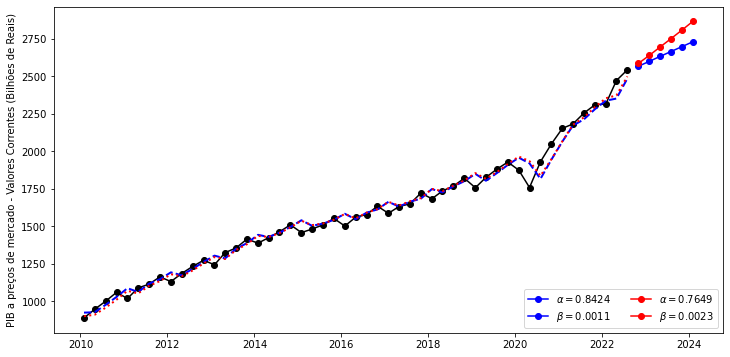

In [ ]:
plt.figure(figsize=(12, 6))
plt.ylabel("PIB a preços de mercado - Valores Correntes (Bilhões de Reais)")

fit1=ExponentialSmoothing(df2.valor,trend="additive",initialization_method="estimated").fit()
fit2 = ExponentialSmoothing(df2.valor,trend="multiplicative", initialization_method="estimated").fit()

plt.plot(df2.valor, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue",linewidth=2, linestyle="dashed")
plt.plot(fit2.fittedvalues, color="red",linewidth=2, linestyle="dotted")

fcast1 = fit1.forecast(6)
fcast2 = fit2.forecast(6)

(line1,) = plt.plot(fcast1, marker="o", color="blue")
(line2,) = plt.plot(fcast2, marker="o", color="red")

plt.legend([line1, line1, line2,line2,line3, line3],
           [r"$\alpha=%s$" % round(fit1.model.params["smoothing_level"],4), r"$\beta=%s$" %round(fit1.model.params["smoothing_trend"],4),
            r"$\alpha=%s$" % round(fit2.model.params["smoothing_level"],4), r"$\beta=%s$" %round(fit2.model.params["smoothing_trend"],4)],
           ncol=2, loc="lower right")
plt.show()

## **Modelo 3. Holt-Winters’ seasonal method**

Finalmente, o modelo de SE de Holt foi generalizado por Holt (1957) e Winters (1960) para modelar o comportamento sazonal presente em séries temporais. O modelo sazonal de Holt-Winters considera três componentes na sua estrutura: Nível, Tendência e Sazonal. 

Salienta-se que neste modelo existem duas variações na estrutura do componente sazonal, o aditivo e o multiplicativo. Em modelos de séries temporais, segundo Morettin e Toloi (1987), quando o componente sazonal varia com a tendência recomenda-se implementar o componente multiplicativo, já quando o componte sazonal não depende de outras componentes o aditivo é recomendado.




### **Holt-Winters’ additive method**

A estrutura do modelo sazonal para o componente aditivo é dado por:

<center>

Equação de forecast: $\hat{Z}_{T+h}= l_T + h b_T +s_{T+h-m(k+1)}$

Equação de nível: $l_T= \alpha (z_t-s_{t-m}) + (1-\alpha)(l_{t-1}+b_{t-1})$

Equação de tendência: $ b_T=\beta \Delta h_t + (1-\beta)b_{t-1}$

Equação de sazonalidade: $ s_t=\gamma (z_t- (l_{t-1}+b_{t-1})) + (1-\gamma)s_{t-m}$ 

</center>

em que $\Delta l_t = l_{T}-l_{t-1}$ e $k$ é a parte inteira de $(h−1)/m$, isto garante que as estimativas dos índices sazonais usados para as previsões sejam provenientes do último período da amostra. Por fim, $m$ representa o período sazonal e é dado fornecido pelo pesquisado, pode-se implementar um periodograma para verificar o período sazonal na série. A estrutura da equação de sazonalidade, $s_t$, é uma média ponderada entre o índice sazonal atual e o índice sazonal um período anterior cujo peso depende do parâmetro a ser estimado $\phi$.

Os parâmetros de suavização e as estimativas iniciais para os componentes nível, tendência e sazonalidade podem ser estimados mínimizando a soma dos quadrados dos resíduos.

### Exemplo

Vamos ajustar a série mensal: Volume de vendas no comércio varejista no estado de São Paulo no período de janeiro de 2005 a dezembro de 2014. Disponível: https://www.ibge.gov.br/estatisticas/economicas/comercio/9227-pesquisa-mensal-de-comercio.html?=&t=series-historicas

In [ ]:
# Série temporal
df3=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Volume_de_vendas.xlsx") #IBGE - Trimestral
df3.index=pd.date_range(start='1/2005', end='1/2015', freq='M')
df3.head()

,mês,ano,valor
2005-01-31,janeiro,2005,47.73022
2005-02-28,fevereiro,2005,43.32036
2005-03-31,março,2005,49.71898
2005-04-30,abril,2005,48.42196
2005-05-31,maio,2005,50.49719


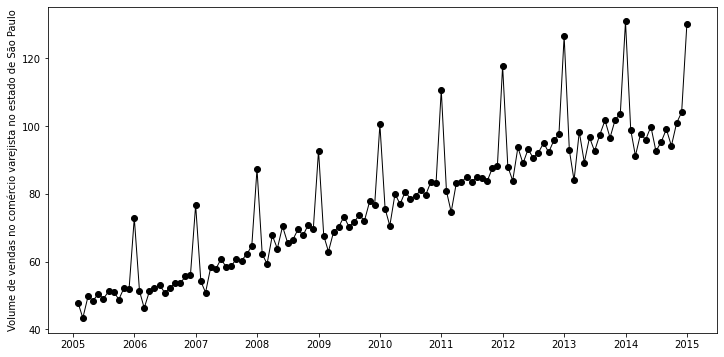

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df3.valor, marker="o", color="black",linewidth=1)
plt.ylabel("Volume de vendas no comércio varejista no estado de São Paulo");

Nota-se que o volume de vendas no comércio varejista, em São Paulo, no período de estudo, apresenta uma tendência crescente e um comportamento sazonal que se repete a cada ano. O maior volume de vendas é sempre observado no mês de dezembro e menor no mês de fevereiro.

A seguir, apresenta-se um gráfico boxplot das vendas agrupadas por mês. Destaca-se que o volume mediano de vendas no mês de dezembro é superior quando comparado com os volumes máximos vendidos em qualquer outro mês no período analisado.

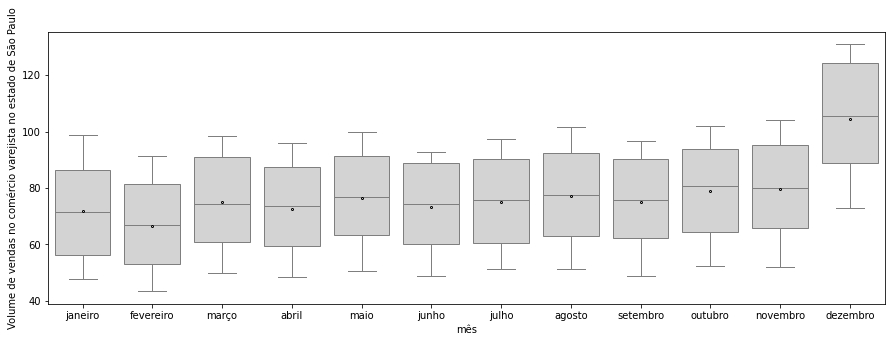

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,5))

sns.boxplot(x="mês", y="valor", data=df3,color="lightgrey", linewidth=1.0, width=0.8,showmeans=True,
                        meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"2"})
plt.ylabel("Volume de vendas no comércio varejista no estado de São Paulo", fontsize=10)

plt.show()

Um modelo de suaviação exponencial considerando tendencia e sazonalidade aditiva  com período de 12 meses foi ajustado. Os parâmetros de suavização e valores iniciais foram estimados minimizando a soma de quadrados dos resíduos.

In [ ]:
Ajuste3 = ExponentialSmoothing(df3.valor,trend="additive",seasonal="multiplicative",seasonal_periods=12,initialization_method="estimated").fit()
print(Ajuste3.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    valor   No. Observations:                  120
Model:             ExponentialSmoothing   SSE                            345.897
Optimized:                         True   AIC                            159.038
Trend:                         Additive   BIC                            203.638
Seasonal:                Multiplicative   AICC                           165.810
Seasonal Periods:                    12   Date:                 Wed, 25 Jan 2023
Box-Cox:                          False   Time:                         20:22:47
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4481294                alpha                 True
smoothing_trend          

Vale ressaltar que os coeficientes estimados para os meses de dezembro (1,305) e fevereiro (0,866) são, respectivamente, o maior e menor valor estimado dos coeficientes sazonais, resultado esperado após a análise descritiva. Os valores previstos para o mês de 2015 são calculados a seguir

In [ ]:
print(Ajuste3.forecast(12))

2015-01-31     97.628489
2015-02-28     90.167506
2015-03-31     99.792640
2015-04-30     97.319915
2015-05-31    102.268795
2015-06-30     97.261836
2015-07-31    101.670851
2015-08-31    105.910797
2015-09-30    101.261831
2015-10-31    107.332460
2015-11-30    109.284386
2015-12-31    135.089100
Freq: M, dtype: float64


Como exemplo consideram-se três novos modelos alterando o tipo de tendência (aditiva ou multiplicativa) e considerando no último modelo um período sazonal de 6 meses.

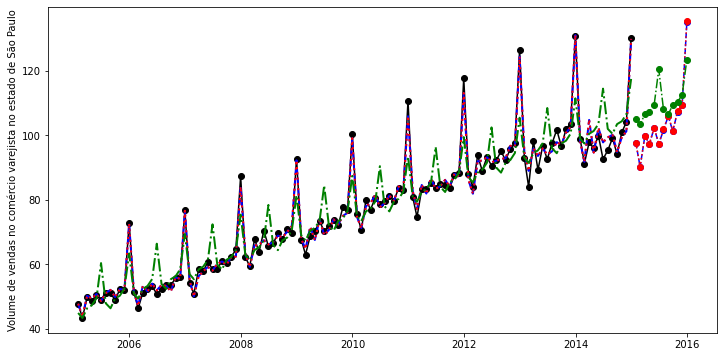

In [ ]:
plt.figure(figsize=(12, 6))


fit1=ExponentialSmoothing(df3.valor,trend="additive",seasonal="additive",seasonal_periods=12,initialization_method="estimated").fit()
fit2=ExponentialSmoothing(df3.valor,trend="multiplicative",seasonal="additive",seasonal_periods=12,initialization_method="estimated").fit()
fit3=ExponentialSmoothing(df3.valor,trend="additive",seasonal="additive",seasonal_periods=6,initialization_method="estimated").fit()


plt.plot(df3.valor, marker="o", color="black")
plt.ylabel("Volume de vendas no comércio varejista no estado de São Paulo", fontsize=10)

plt.plot(fit1.fittedvalues, color="blue",linewidth=2, linestyle="dashed")
plt.plot(fit2.fittedvalues, color="red",linewidth=2, linestyle="dotted")
plt.plot(fit3.fittedvalues, color="green",linewidth=2, linestyle="dashdot")


fcast1 = fit1.forecast(12)
fcast2 = fit2.forecast(12)
fcast3 = fit3.forecast(12)

(line1,) = plt.plot(fcast1, marker="o", color="blue", linestyle="dashed")
(line2,) = plt.plot(fcast2, marker="o", color="red", linestyle="dotted")
(line3,) = plt.plot(fcast3, marker="o", color="green", linestyle="dashdot")



Salienta-se que quando considerado um período sazonal de 6 meses os valores ajustados não acompanham o comportamento da série. Por fim, quando considera uma tendência multiplicativa os valores previstos para o ano de 2015 são ligeramente superiores aos obtivos quando considerada uma tendência aditiva.

In [ ]:
pd.DataFrame(data={'Previsões Modelo 1':fcast1, 'Previsões Modelo 2':fcast2})

,Previsões Modelo 1,Previsões Modelo 2
2015-01-31,97.628489,97.660392
2015-02-28,90.167506,90.216797
2015-03-31,99.792640,99.867127
2015-04-30,97.319915,97.412294
2015-05-31,102.268795,102.378612
2015-06-30,97.261836,97.395964
2015-07-31,101.670851,101.825787
2015-08-31,105.910797,106.076975
2015-09-30,101.261831,101.439239
2015-10-31,107.332460,107.521677


### **Holt-Winters’ multiplicative method**

A estrutura do modelo sazonal para o componente multiplicativo é dado por:

<center>

Equação de forecast: $\hat{Z}_{T+h}= (l_T + h b_T) \times s_{t+h-m(k+1)}$

Equação de nível: $l_T= \alpha \frac{z_t}{s_{t-m}} + (1-\alpha)(l_{t-1}+b_{t-1})$

Equação de tendência: $ b_T=\beta(l_{t}-l_{t-1}) + (1-\beta)b_{t-1}$

Equação de sazonalidade: $ s_t=\gamma \frac{z_t} {(l_{t-1}+b_{t-1})} + (1-\gamma)s_{t-m}$ 

</center>

Valores pequenos (próximos de zero) de $\phi$ para o modelo multiplicativo indicam que o componente sazonal dificilmente muda ao longo do tempo.

### Exemplo

Vamos modelar a série mensal: Número total de passageiros de uma companhia aérea dos EUA no período de janeiro de 1949 a dezembro de 1960.

In [ ]:
# Série temporal
df4=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv") 
df4.index=pd.date_range(start='1/1949', end='1/1961', freq='M')
df4.head()

,Month,Passengers
1949-01-31,1949-01,112
1949-02-28,1949-02,118
1949-03-31,1949-03,132
1949-04-30,1949-04,129
1949-05-31,1949-05,121


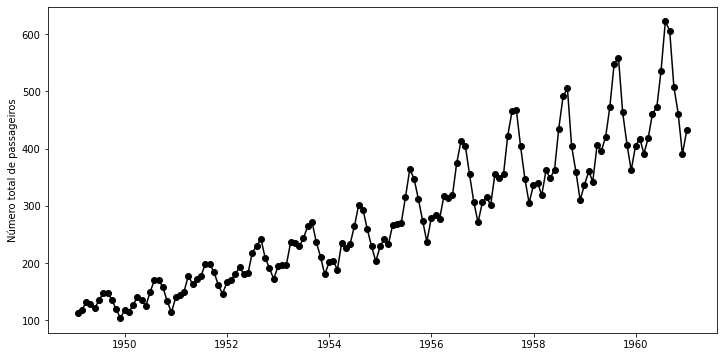

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df4.Passengers, marker="o", color="black")
plt.ylabel("Número total de passageiros");

Observa-se que o número total de passageiros da companhia aérea em questão apresenta uma tendência crescente e um comportamento sazonal que se repete a cada ano, cuja amplitude aumenta conforme aumenta a tendência. Assim, recomenda-se usar um modelo de SE componente sazonal multiplicativo.

No gráfico de boxplot a seguir apresenta-se o número de passageiros agrupados por mês, observa-se que, no período considerado, o maior número de passageiros é observado nos trimestre de junnho a agosto, possivelmente relacionado com o período de férias e o clima de verão.

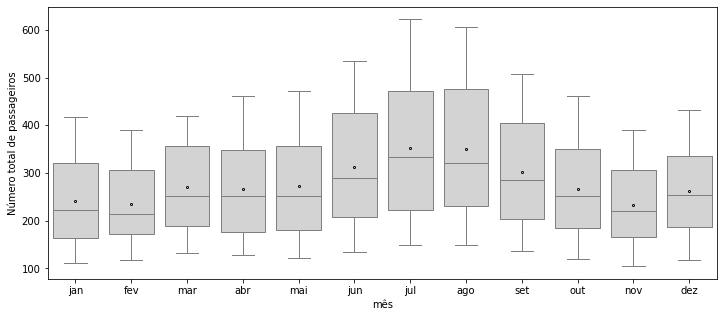

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,5))

df4["mês"]=["jan", "fev", "mar", "abr","mai","jun","jul","ago","set", "out", "nov","dez"]*12
sns.boxplot(x="mês", y="Passengers", data=df4,color="lightgrey", linewidth=1.0, width=0.8,showmeans=True,
                        meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"2"})
plt.ylabel("Número total de passageiros", fontsize=10)

plt.show()

Um modelo de Holt-Winters com componente sazonal multiplicativo e tendência aditiva foi ajustado. 

In [ ]:
Ajuste4 = ExponentialSmoothing(df4.Passengers,trend="additive",seasonal="multiplicative",seasonal_periods=12,initialization_method="estimated").fit()
print(Ajuste4.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Passengers   No. Observations:                  144
Model:             ExponentialSmoothing   SSE                          15952.880
Optimized:                         True   AIC                            709.892
Trend:                         Additive   BIC                            757.409
Seasonal:                Multiplicative   AICC                           715.364
Seasonal Periods:                    12   Date:                 Sat, 21 Jan 2023
Box-Cox:                          False   Time:                         03:18:38
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3185898                alpha                 True
smoothing_trend          

Nota-se que os maiores coeficientes sazonais correspondem aos mês junho, julho e agosto conforme observado na análise descritiva. O parâmetro de suavização de nível e sazonalidade indicam que o nível da série muda a cada nova observação e há um forte componente sazonal nos dados. 

Nos exemplos seguinte apresentam-se os comportamentos das previsões alterando o tipo de tendência e sazonalidade (aditiva ou multiplicativa). Nota-se que as previsões apresentam valores semelhantes.

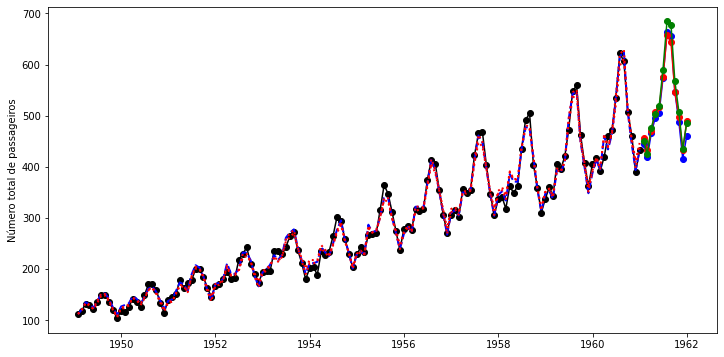

In [ ]:
plt.figure(figsize=(12, 6))


fit1=ExponentialSmoothing(df4.Passengers,trend="additive",seasonal="multiplicative",seasonal_periods=12,initialization_method="estimated").fit()
fit2=ExponentialSmoothing(df4.Passengers,trend="multiplicative",seasonal="additive",seasonal_periods=12,initialization_method="estimated").fit()
fit3=ExponentialSmoothing(df4.Passengers,trend="multiplicative",seasonal="multiplicative",seasonal_periods=12,initialization_method="estimated").fit()
plt.ylabel("Número total de passageiros")

plt.plot(df4.Passengers, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue",linewidth=2, linestyle="dashed")
plt.plot(fit2.fittedvalues, color="red",linewidth=2, linestyle="dotted")
plt.plot(fit3.fittedvalues, color="red",linewidth=2, linestyle="dotted")

fcast1 = fit1.forecast(12)
fcast2 = fit2.forecast(12)
fcast3 = fit3.forecast(12)


(line1,) = plt.plot(fcast1, marker="o", color="blue")
(line2,) = plt.plot(fcast2, marker="o", color="red")
(line3,) = plt.plot(fcast3, marker="o", color="green")


## Reciclagem

Neste modelo são atribuidos pesos maiores a observações mais recentes do que a observações mais distantes. Os pesos atribuidos diminuem exponencialmente conforme as observações se afastam — os menores pesos estão associados às observações mais antigas:

compreende a equação de previsão e três equações de suavização — uma para o nível ℓt , uma para a tendência bt e uma para o componente sazonal st , com os correspondentes parâmetros de suavização α, β∗ e γ.

O pequeno valor de β∗ para o modelo aditivo significa que a componente de declive dificilmente muda ao longo do tempo (verifique a escala vertical). O tamanho crescente do componente sazonal para o modelo aditivo sugere que o modelo é menos apropriado do que o modelo multiplicativo.

https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

Uma tendência aditiva indica uma tendência linear e uma sazonalidade aditiva indica a mesma frequência (largura) e amplitude (altura) dos ciclos sazonais.
Uma tendência multiplicativa indica uma tendência não linear (linha de tendência curva) e uma sazonalidade multiplicativa indica aumento/diminuição da frequência (largura) e/ou amplitude (altura) dos ciclos sazonais.

An additive trend indicates a linear trend, and an additive seasonality indicates the same frequency (width) and amplitude (height) of seasonal cycles.
A multiplicative trend indicates a non-linear trend (curved trend line), and a multiplicative seasonality indicates increasing/decreasing frequency (width) and/or amplitude (height) of seasonal cycles.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


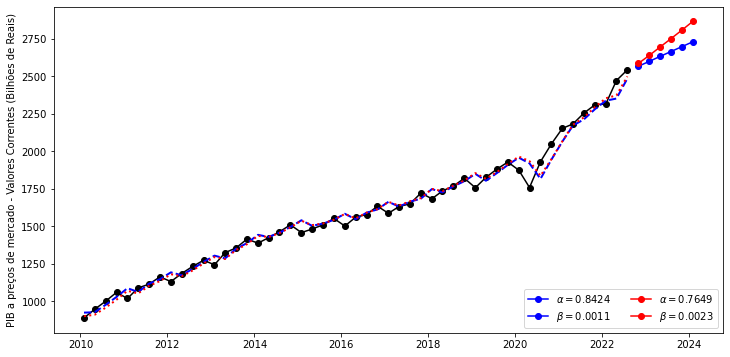